In [1]:
# Import librairies
import pandas as pd
import numpy as np
import warnings

# Ignore warnings
warnings.simplefilter("ignore", category=FutureWarning)

### La base de données ISIC

La base ISIC est une collection ouverte d'images médicales de la peau, principalement utilisée pour la détection de maladies dermatologiques (comme les mélanomes).

Elle est développée par l’International Skin Imaging Collaboration, un consortium international regroupant chercheurs, hôpitaux, universités et entreprises de santé.

### La base de données ISIC

**1. Images dermoscopiques**

    - Photographies cliniques en haute résolution de lésions cutanées (grains de beauté, taches, mélanomes, etc.).

    - Environ 70 000+ images au total.

**2. Métadonnées cliniques**

    - Sexe, âge du patient

    - Localisation anatomique de la lésion (dos, bras, visage…)

    - Type de peau (parfois)

    - Contexte clinique

**3. Annotations / Étiquettes**

    - Diagnostic : bénin, malin, mélanome, kératose, etc.

    - Masques de segmentation (pour les compétitions comme ISIC 2017)

    - Éventuellement : avis de plusieurs experts dermatologues



## Loading dataset

In [14]:
# La base de données ISIC est une base de données d'images de lésions cutanées
!pip install isic-cli

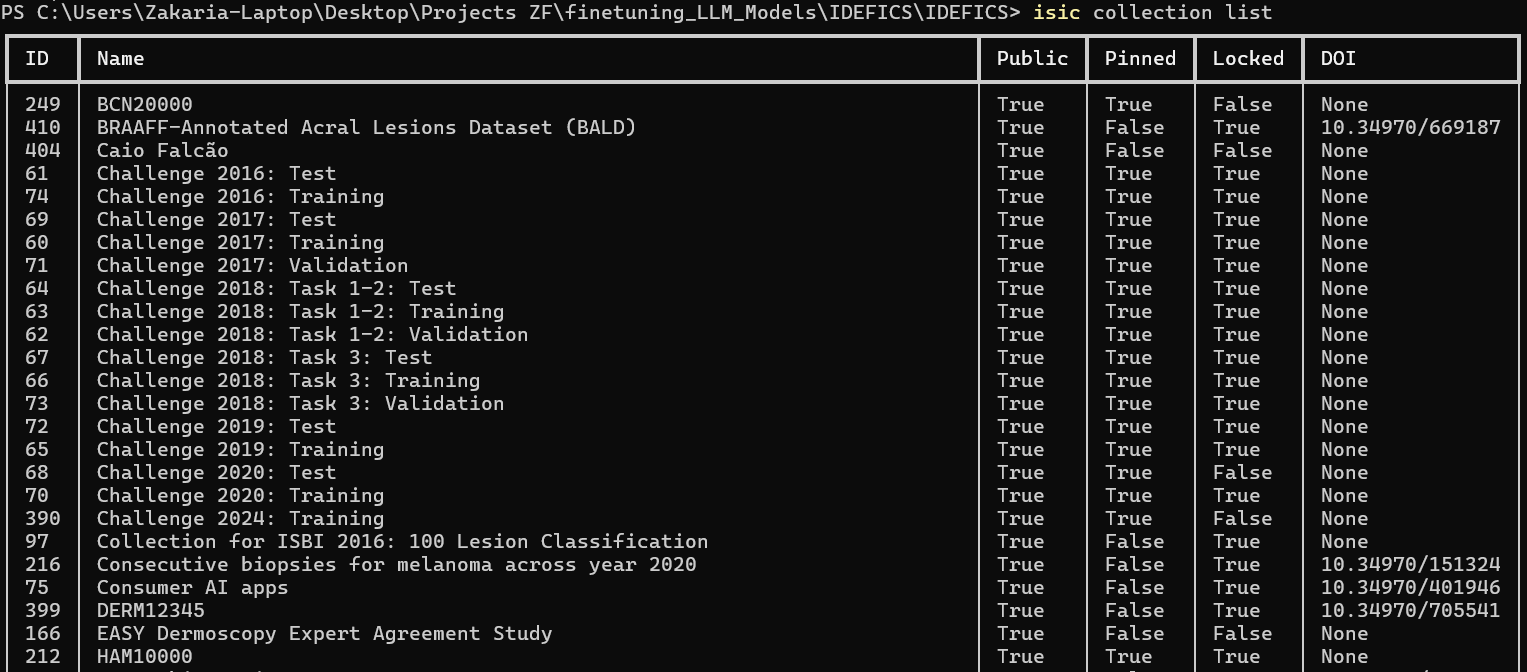

In [20]:
#isic user login
#isic image download -h
#isic collection list

# J'ai choisi cette dataset: Challenge 2024: Training
#Une base de 401 059 images

#isic image download -c 390 -l 6000 ./multiple_collections

## Data exploration

In [25]:
metadata = pd.read_csv('./multiple_collections/metadata.csv')
print(f" Voici la liste de nos colonnes: \n {metadata.columns}")
print()
print("Check of Nans")
metadata.isna().sum()

 Voici la liste de nos colonnes: 
 Index(['isic_id', 'attribution', 'copyright_license', 'acquisition_day',
       'age_approx', 'anatom_site_general', 'benign_malignant',
       'clin_size_long_diam_mm', 'concomitant_biopsy', 'diagnosis_1',
       'diagnosis_confirm_type', 'image_type', 'lesion_id', 'patient_id',
       'pixels_x', 'pixels_y', 'sex', 'tbp_tile_type'],
      dtype='object')

Check of Nans


isic_id                      0
attribution                  0
copyright_license            0
acquisition_day              0
age_approx                   0
anatom_site_general          0
benign_malignant             0
clin_size_long_diam_mm       0
concomitant_biopsy           0
diagnosis_1                  0
diagnosis_confirm_type       0
image_type                   0
lesion_id                 5797
patient_id                   0
pixels_x                     0
pixels_y                     0
sex                          0
tbp_tile_type                0
dtype: int64

In [26]:
for col in metadata.columns:
  print(col,"*****************")
  print(metadata[col].unique())
  print()

isic_id *****************
['ISIC_7041706' 'ISIC_8636967' 'ISIC_8618154' ... 'ISIC_7912497'
 'ISIC_0770923' 'ISIC_7049109']

attribution *****************
['Courtesy of ACEMID MIA']

copyright_license *****************
['CC-0']

acquisition_day *****************
[23757 20862 13842 30697 16848 28833 17359]

age_approx *****************
[50 80 60 75]

anatom_site_general *****************
['posterior torso' 'lower extremity' 'anterior torso' 'upper extremity'
 'head/neck']

benign_malignant *****************
['benign']

clin_size_long_diam_mm *****************
[ 4.11  2.54  3.01  2.99  2.52  2.74  3.15  2.79  2.9   4.56  3.61  2.76
  2.93  7.72  3.37  4.29  3.42  4.04  5.04  3.46  3.29  2.63  4.07  2.81
  7.23  3.7   4.21  1.64  2.57  3.43  4.27  6.45  2.6   3.49  2.7   5.34
  2.67  2.55  3.06  2.62  2.5   3.78  2.88  3.17  2.72  3.6   2.75  3.2
  3.68  3.12  2.58  2.82  4.05  3.04  2.97  7.74  4.63  4.17  6.88  3.25
  2.65  2.89  2.71  7.88  5.13  2.27  5.88  3.02  2.59  2.77  3.77  4.31